In [2]:
import cuml
from sklearn.model_selection import train_test_split
import mglearn

/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#K邻近算法
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=0)

/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [7]:
from cuml.neighbors import kneighbors_classifier
clf = kneighbors_classifier.KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train,y_train)


In [9]:
#预测结果
print("Test set predictions: {} ".format(clf.predict(X_test)))


Test set predictions: [1 0 1 0 1 0 0] 


In [10]:
#评价模型
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))


Test set accuracy: 0.86


In [20]:
#另一个关于K邻近的例子
from sklearn.datasets import load_breast_cancer

In [21]:
#准备数据
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test =  train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
train_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

In [22]:
for n_nerghbors in neighbors_settings:
    clf = kneighbors_classifier.KNeighborsClassifier(n_neighbors=n_nerghbors)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))



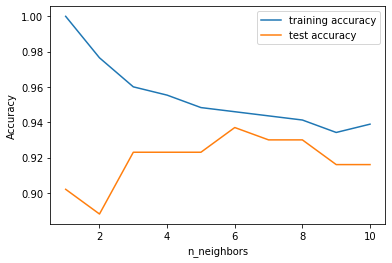

In [23]:
import matplotlib.pyplot as plt
plt.plot(neighbors_settings,train_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [31]:
#K邻近回归示例
from cuml.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)



/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/cuml/utils/input_utils.py:222: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [32]:
print(print("Test set predictions: {} ".format(reg.predict(X_test))))

Test set predictions: [-0.05396539  0.35686049  1.13671923 -1.89415681 -1.13881397 -1.63113368
  0.35686049  0.91241378 -0.44680443 -1.13881397] 
None


/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/cuml/utils/input_utils.py:222: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [33]:
#评价模型
print("Test set r^2: {:.2f}".format(reg.score(X_test,y_test)))



Test set r^2: 0.83


/home/liukai/anaconda3/envs/liukai/lib/python3.6/site-packages/cuml/utils/input_utils.py:222: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "
